<a href="https://colab.research.google.com/github/sam2005-max/my_paypal/blob/main/My_Paypal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Blog Post

In [ ]:
# blog post ->
# https://medium.com/@xamidovs005/mypaypal-de65bc194f7f

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from sklearn.impute import SimpleImputer
from sklearn import preprocessing
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from lightgbm import LGBMRegressor
from sklearn.svm import LinearSVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeRegressor

In [ ]:
def load_dataset():
  return pd.read_csv("/content/my_paypal_creditcard.csv")
data = load_dataset()

In [ ]:
data

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [ ]:
def add_new_index_column(data):
  indx = []
  for i in data.index:
    indx.append(i)
  data['indx'] = indx
add_new_index_column(data)
data

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V22,V23,V24,V25,V26,V27,V28,Amount,Class,indx
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0,1
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0,2
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0,3
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0,284802
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0,284803
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0,284804
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0,284805


In [ ]:
def information_of_data(data):
  data.info()
information_of_data(data)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 32 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [ ]:
def null_value_of_data(data):
  print(data.isnull().sum())
null_value_of_data(data)

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
indx      0
dtype: int64


In [ ]:
var_1 = 0
var_2 = 0
for i in data.Class:
  if i == 1:
    var_1 += 1
  elif i == 0:
    var_2 += 1
  fraudster = var_1 / (var_1 + var_2) * 100
  client  = var_2 / (var_1 + var_2) * 100
print(f"{fraudster}%")
print(f"{client}%")

0.1727485630620034%
99.82725143693798%


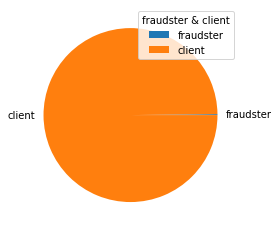

In [ ]:
def visualise_piechart_Class_column(var_1,var_2):
  var_3 = [fraudster,client]
  mylabels = ['fraudster','client']
  plt.pie(var_3, labels = mylabels)
  plt.legend(title = "fraudster & client")
  plt.show()
visualise_piechart_Class_column(var_1,var_2)

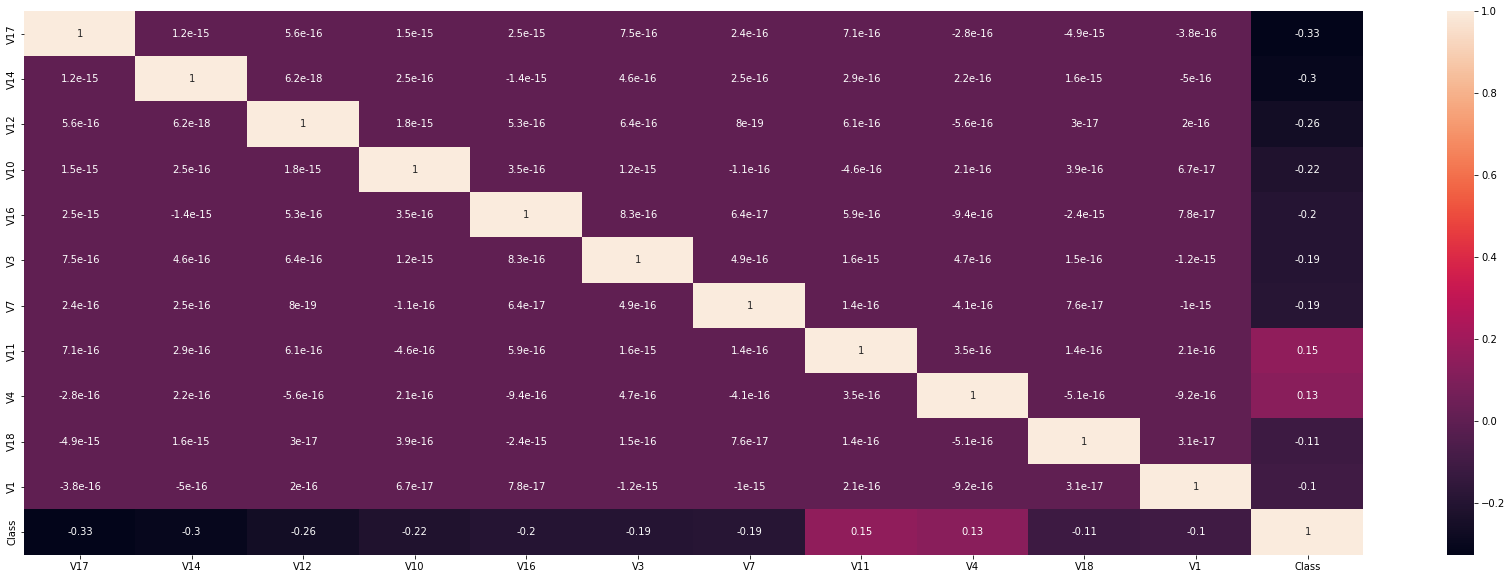

In [ ]:
def compute_correlations_matrix_with_seaborn_visualization(data):
  cor=data[['V17', 'V14','V12', 'V10', 'V16',
            'V3', 'V7', 'V11', 'V4','V18','V1','Class']].corr()
  plt.subplots(figsize=(30,10))
  sns.heatmap(cor,annot=True)
compute_correlations_matrix_with_seaborn_visualization(data)

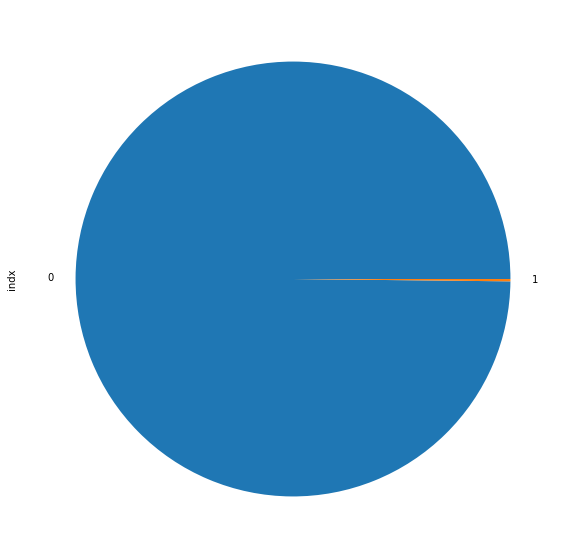

In [ ]:
def visualisation_class_column(data):
  clas = data.groupby(['Class']).count()['indx']
  clas.plot(kind = 'pie', figsize=(30,10))
  plt.grid(axis = 'y')
visualisation_class_column(data)

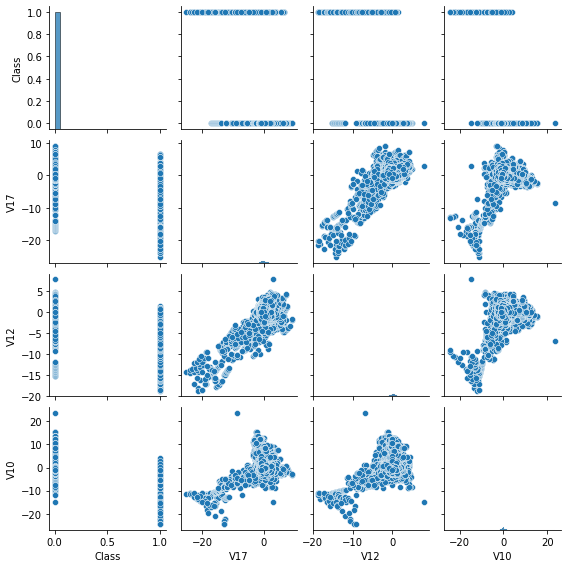

In [ ]:
def print_pairplot(data):
  cols = ['Class', 'V17', 'V12', 'V10']
  sns.pairplot(data[cols], height=2)
  plt.show()
print_pairplot(data)

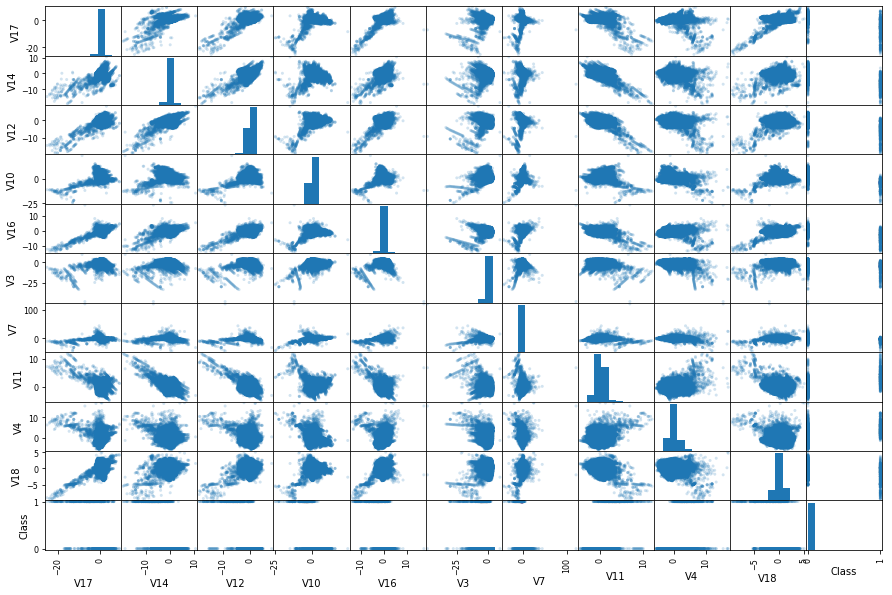

In [ ]:
def print_scatter_matrix(data):
  df = data[['V17', 'V14','V12', 'V10', 'V16',
            'V3', 'V7', 'V11', 'V4','V18','Class']]
  pd.plotting.scatter_matrix(df, alpha=0.2, figsize=(15,10))
print_scatter_matrix(data) 

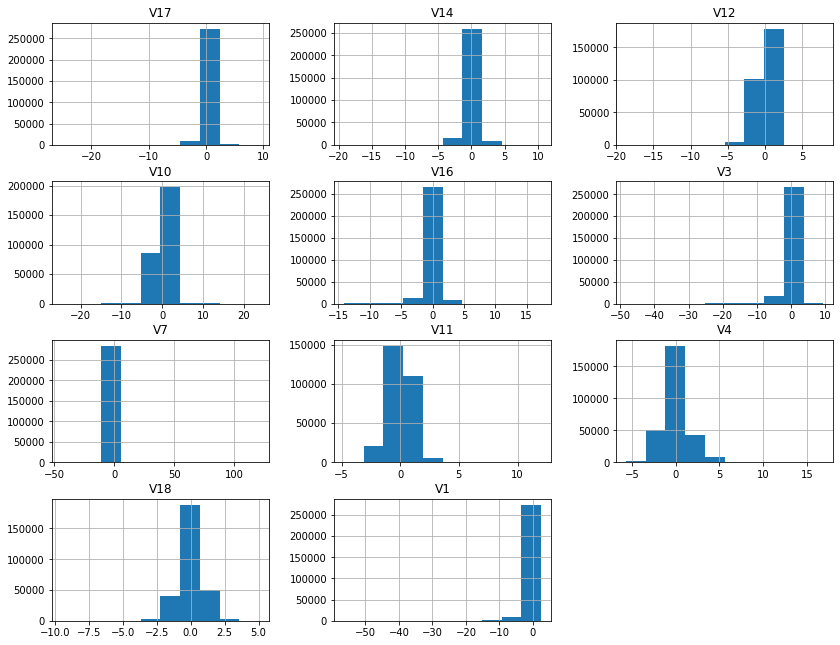

In [ ]:
def print_histograms(data):
  df = data[['V17', 'V14','V12', 'V10', 'V16',
            'V3', 'V7', 'V11', 'V4','V18','V1']]
  df.hist(bins=10,figsize=(14,11))
print_histograms(data)

In [ ]:
def compute_correlations_price_ratio(dataset):
  correlations = dataset.corr()
  res = correlations["Class"].abs().sort_values(ascending=False)
  print(res)
compute_correlations_price_ratio(data)

Class     1.000000
V17       0.326481
V14       0.302544
V12       0.260593
V10       0.216883
V16       0.196539
V3        0.192961
V7        0.187257
V11       0.154876
V4        0.133447
V18       0.111485
V1        0.101347
V9        0.097733
V5        0.094974
V2        0.091289
V6        0.043643
V21       0.040413
V19       0.034783
V20       0.020090
V8        0.019875
V27       0.017580
Time      0.012323
indx      0.011692
V28       0.009536
V24       0.007221
Amount    0.005632
V13       0.004570
V26       0.004455
V15       0.004223
V25       0.003308
V23       0.002685
V22       0.000805
Name: Class, dtype: float64


In [ ]:
def paypal_fit_model_prediction(data):
  X = data[['V17', 'V14','V12', 'V10', 'V16',
            'V3', 'V7', 'V11', 'V4','V18','V1']]
  y = data['Class']
  x_train,x_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state = 16)
  models = {"KNeighborsRegressor":KNeighborsRegressor(), "LinearRegression":LinearRegression(), 
              "DecisionTreeRegressor":DecisionTreeRegressor(), "LGBMRegressor":LGBMRegressor(n_estimators=1000)}
  print("Models accuracy:")
  for key, model in models.items():
    model.fit(x_train,y_train)
    y_pred = model.predict(x_test)
    print(f"{key}: {round(r2_score(y_test,y_pred)*100)}%")
paypal_fit_model_prediction(data)

Models accuracy:
KNeighborsRegressor: 77%
LinearRegression: 54%
DecisionTreeRegressor: 47%
LGBMRegressor: 71%


In [ ]:
X = data[['V17', 'V14','V12', 'V10', 'V16',
            'V3', 'V7', 'V11', 'V4','V18','V1']]
y = data['Class']
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state = 16)
model = keras.models.Sequential([
    keras.layers.Dense(512, activation="relu", input_shape=(x_train.shape[1],)),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(256,activation="relu"),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(128,activation="relu"),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(64,activation="relu"),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(10, activation="softmax"),
    
])

In [ ]:
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               6144      
                                                                 
 dropout (Dropout)           (None, 512)               0         
                                                                 
 dense_1 (Dense)             (None, 256)               131328    
                                                                 
 dropout_1 (Dropout)         (None, 256)               0         
                                                                 
 dense_2 (Dense)             (None, 128)               32896     
                                                                 
 dropout_2 (Dropout)         (None, 128)               0         
                                                                 
 dense_3 (Dense)             (None, 64)                8

In [ ]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics='accuracy')

In [ ]:
history = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=300, batch_size=128)

Epoch 1/300
1781/1781 [==============================] - 21s 11ms/step - loss: 0.0127 - accuracy: 0.9986 - val_loss: 0.0029 - val_accuracy: 0.9993
Epoch 2/300
1781/1781 [==============================] - 16s 9ms/step - loss: 0.0044 - accuracy: 0.9993 - val_loss: 0.0035 - val_accuracy: 0.9995
Epoch 3/300
1781/1781 [==============================] - 17s 10ms/step - loss: 0.0044 - accuracy: 0.9993 - val_loss: 0.0026 - val_accuracy: 0.9995
Epoch 4/300
1781/1781 [==============================] - 17s 10ms/step - loss: 0.0044 - accuracy: 0.9993 - val_loss: 0.0025 - val_accuracy: 0.9995
Epoch 5/300
1781/1781 [==============================] - 17s 9ms/step - loss: 0.0041 - accuracy: 0.9994 - val_loss: 0.0026 - val_accuracy: 0.9995
Epoch 6/300
1781/1781 [==============================] - 16s 9ms/step - loss: 0.0038 - accuracy: 0.9993 - val_loss: 0.0023 - val_accuracy: 0.9995
Epoch 7/300
1781/1781 [==============================] - 17s 10ms/step - loss: 0.0040 - accuracy: 0.9994 - val_loss: 0.00

In [ ]:
_, accuracy = model.evaluate(x_test, y_test, batch_size=128)

446/446 [==============================] - 1s 3ms/step - loss: 0.0576 - accuracy: 0.9995


In [ ]:
print(f"Accuracy: {(accuracy)*100}") # print accuracy

Accuracy: 99.94909167289734
